# 프로젝트 구조
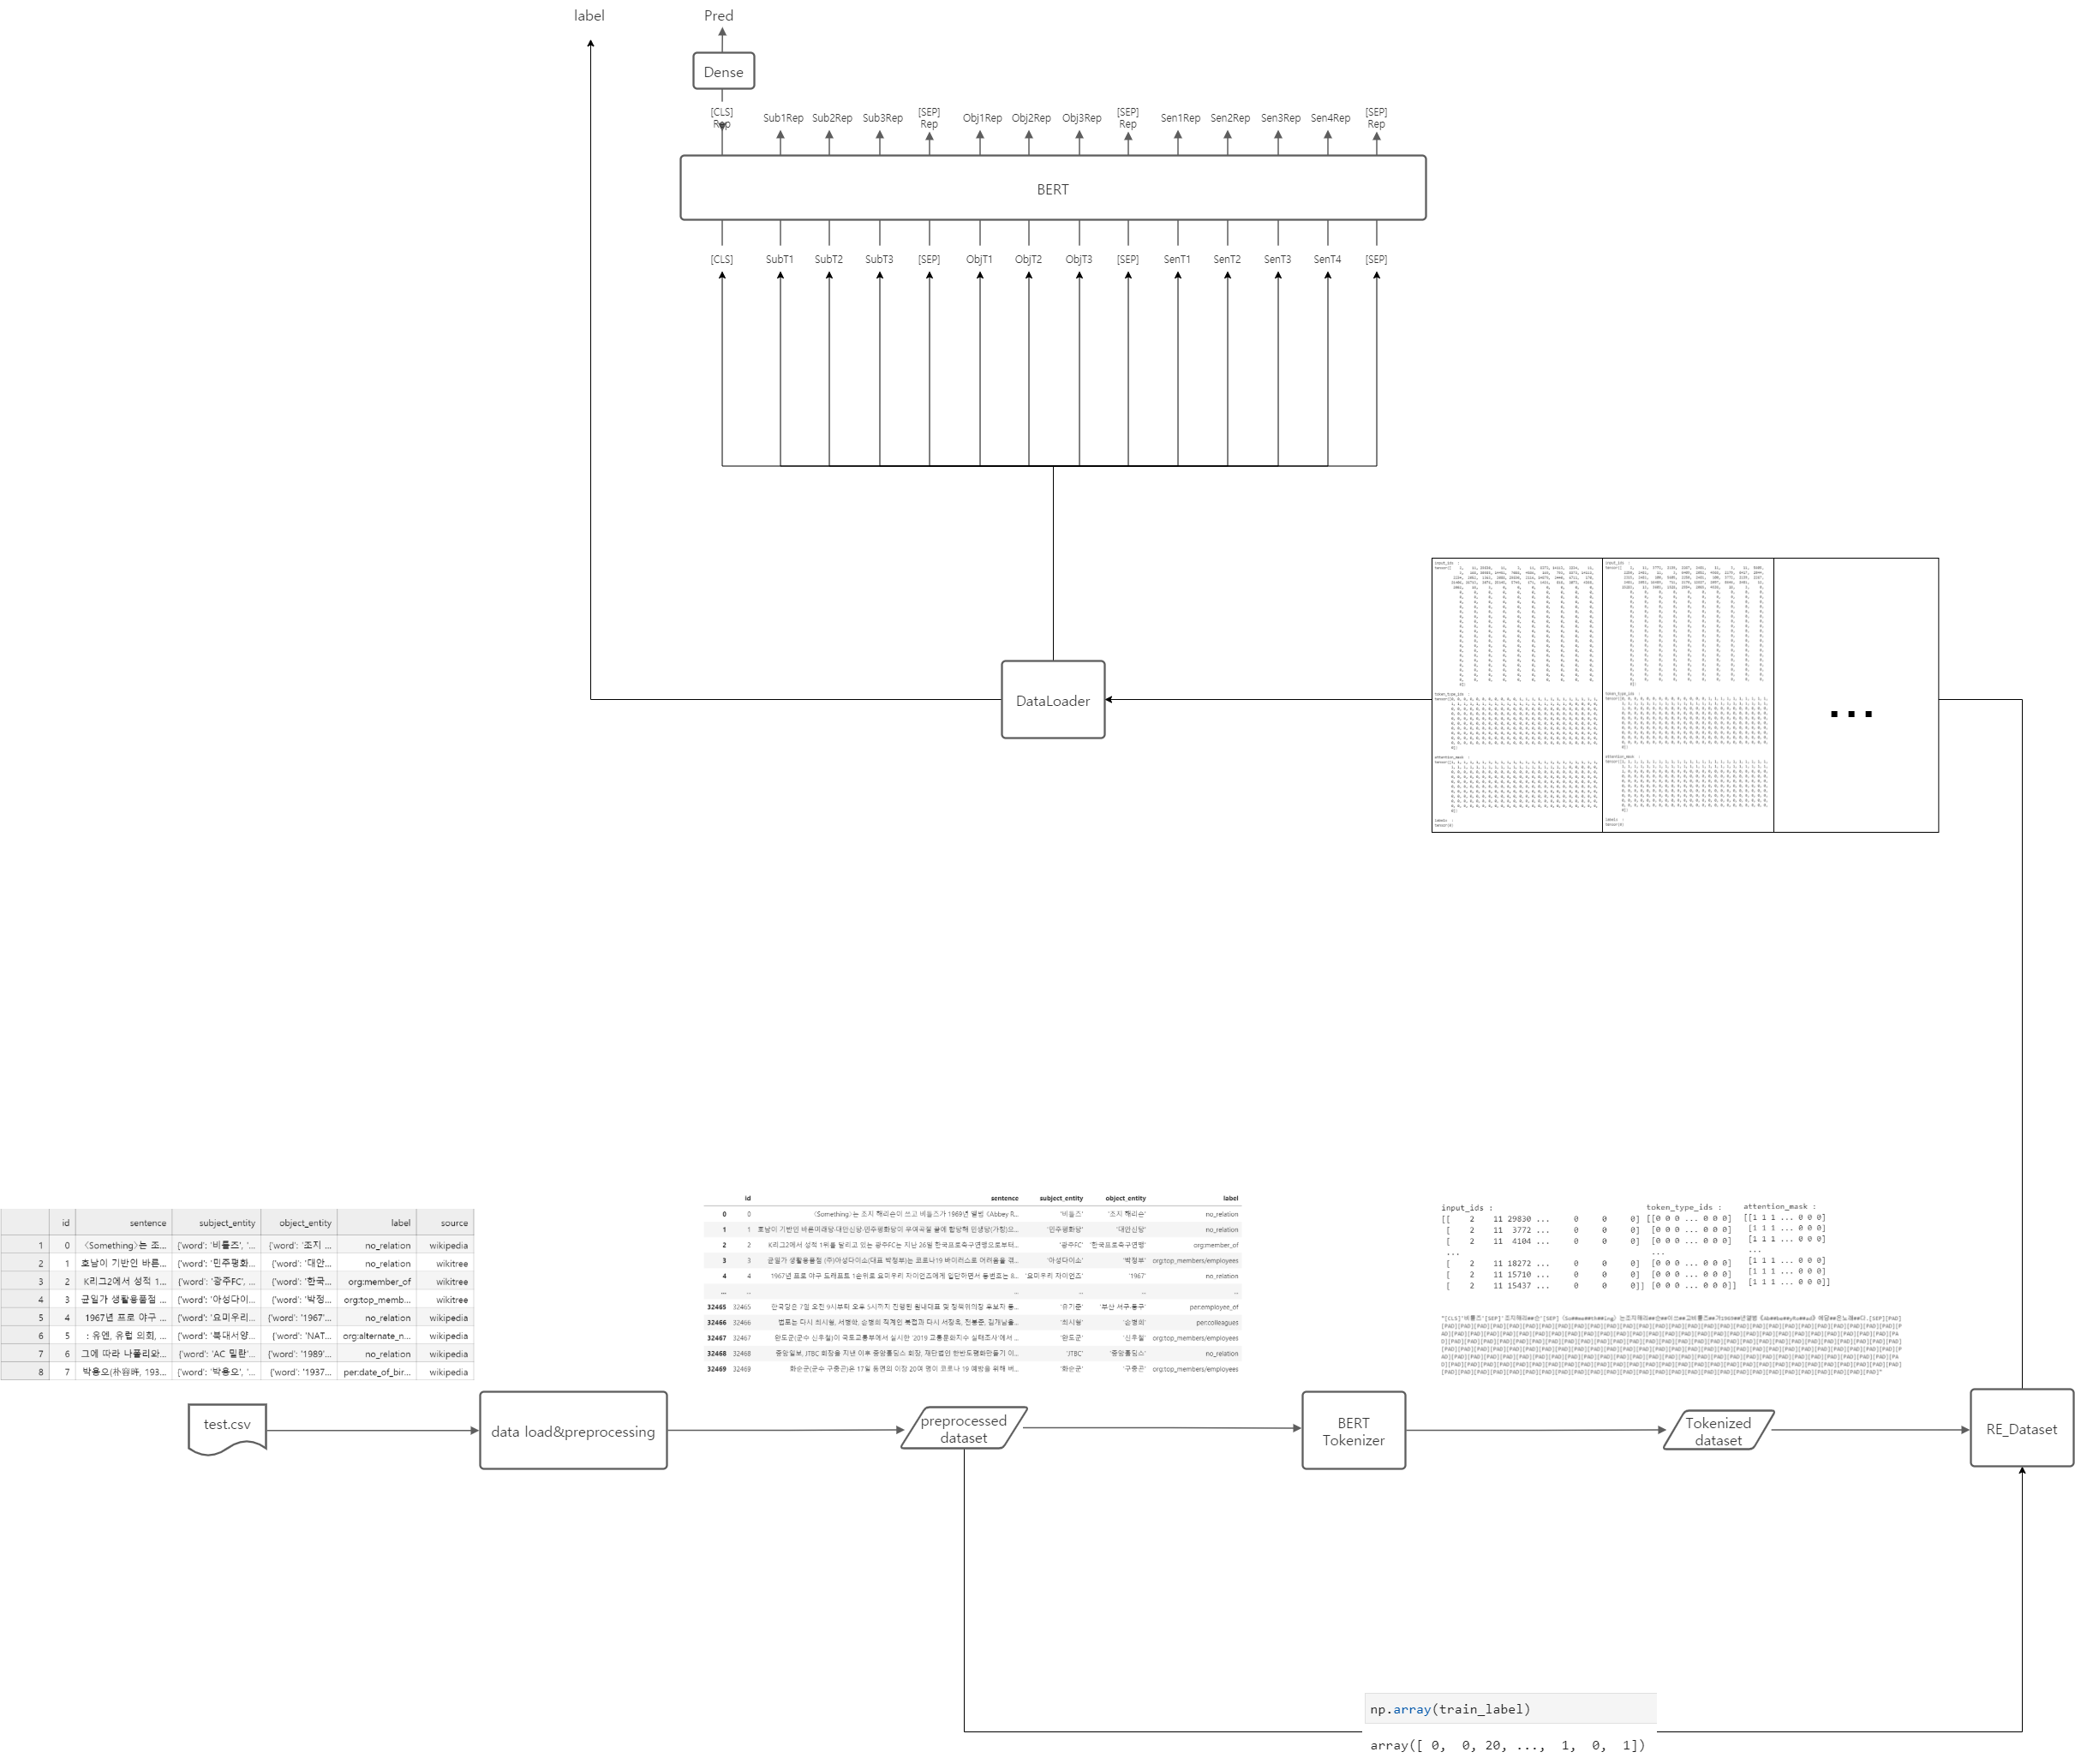

In [1]:
import pickle as pickle
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader
import numpy as np
from load_data import *
import matplotlib.pyplot as plt
import re

In [2]:
def label_to_num(label):
  num_label = []
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [3]:
train_dataset = load_data("../dataset/train/train.csv")
raw_dataset = pd.read_csv("../dataset/train/train.csv")
train_dataset

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,'비틀즈','조지 해리슨',no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,'민주평화당','대안신당',no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,'광주FC','한국프로축구연맹',org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,'아성다이소','박정부',org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,'요미우리 자이언츠','1967',no_relation
...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,'유기준','부산 서구·동구',per:employee_of
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",'최시형','손병희',per:colleagues
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,'완도군','신우철',org:top_members/employees
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",'JTBC','중앙홀딩스',no_relation


In [4]:
train_dataset.info

<bound method DataFrame.info of           id                                           sentence  \
0          0  〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...   
1          1  호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...   
2          2  K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...   
3          3  균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...   
4          4  1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...   
...      ...                                                ...   
32465  32465  한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...   
32466  32466  법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...   
32467  32467  완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...   
32468  32468  중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...   
32469  32469  화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버...   

      subject_entity object_entity                      label  
0              '비틀즈'      '조지 해리슨'                no_relation  
1            '민주평화당'        '대안신당' 

# 데이터 통계

In [5]:
train_dataset.describe(include='all')

,id,sentence,subject_entity,object_entity,label
count,32470.000000,32470,32470,32470,32470
unique,NaN,28803,12052,10195,30
top,NaN,"정의당은 통합 이후 당명 개정을 위한 당명 공모를 진행했고, 2016년 9월 25일...",'민주당','대한민국',no_relation
freq,NaN,3,144,276,9534
mean,16234.500000,NaN,NaN,NaN,NaN
std,9373.425957,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,8117.250000,NaN,NaN,NaN,NaN
50%,16234.500000,NaN,NaN,NaN,NaN
75%,24351.750000,NaN,NaN,NaN,NaN


# 데이터 중복 제거

In [6]:
print(len(train_dataset))
train_dataset.drop_duplicates(subset=['sentence','subject_entity','object_entity'], inplace= True)
print(len(train_dataset))

32470
32417


# 데이터 통계

 '민주당'          144
 '화순군'          107
 '고흥군'           99
 '광주광역시'         92
 '더불어민주당'        89
               ... 
 '이언도'            1
 '시노하라 료코'        1
 '니시테쓰 관광버스'      1
 '혼조 스즈'          1
 '로베르토 도나도니'      1
Name: subject_entity, Length: 12052, dtype: int64


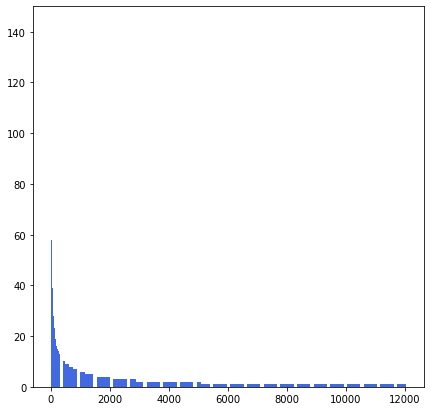

In [7]:
print(train_dataset['subject_entity'].value_counts())

fig, axes = plt.subplots(1, 1, figsize=(7, 7))

subject_entity_cnt_list = train_dataset['subject_entity'].value_counts().values

axes.set_ylim(0,150)
axes.bar(range(len(subject_entity_cnt_list)),subject_entity_cnt_list, color='royalblue')

plt.show()

 '대한민국'            276
 '자유한국당'           268
 '더불어민주당'          234
 '문재인'             132
 'UEFA'            116
                  ... 
 '양시칠리아 왕국'          1
 '1479년 1월 20일'      1
 'Marco Wölfli'      1
 '신슬기'               1
 '200                1
Name: object_entity, Length: 10195, dtype: int64


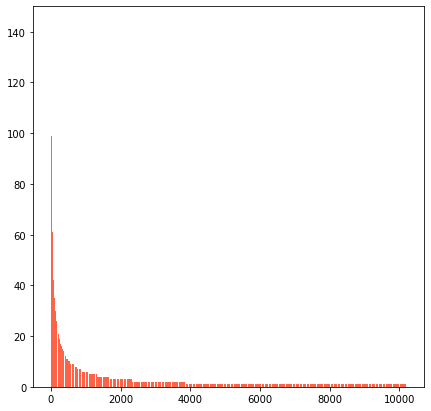

In [8]:
print(train_dataset['object_entity'].value_counts())

fig, axes = plt.subplots(1, 1, figsize=(7, 7))

object_entity_cnt_list = train_dataset['object_entity'].value_counts().values

axes.set_ylim(0,150)
axes.bar(range(len(object_entity_cnt_list)),object_entity_cnt_list, color='tomato')

plt.show()

no_relation                            9513
org:top_members/employees              4277
per:employee_of                        3565
per:title                              2098
org:member_of                          1864
org:alternate_names                    1318
per:origin                             1234
org:place_of_headquarters              1194
per:date_of_birth                      1130
per:alternate_names                     997
per:spouse                              795
per:colleagues                          534
per:parents                             518
org:founded                             450
org:members                             420
per:date_of_death                       417
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

<ipython-input-9-c4b2ff813088>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label_cnt.index,rotation=275)


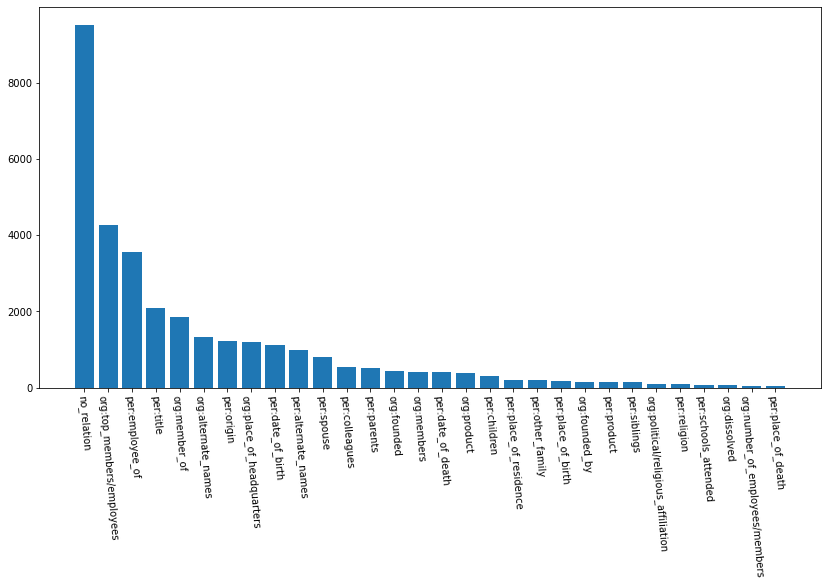

In [9]:
print(train_dataset['label'].value_counts())

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
label_cnt = train_dataset['label'].value_counts()
ax.bar(label_cnt.index,label_cnt)
ax.set_xticklabels(label_cnt.index,rotation=275)
plt.show()

wikipedia          21620
wikitree           10672
policy_briefing      178
Name: source, dtype: int64


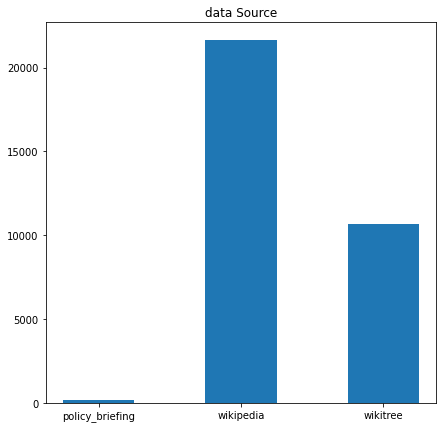

In [10]:
print(raw_dataset['source'].value_counts())

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
source_cnt = raw_dataset['source'].value_counts().sort_index()
ax.set_title('data Source')
ax.bar(source_cnt.index,source_cnt, width=0.5)

plt.show()

In [11]:
group = train_dataset.groupby('subject_entity')['object_entity'].value_counts().sort_values()
display(group)

subject_entity  object_entity
 '(유)시민버스'       '시내버스협의회'         1
 '스벤 크라머르'       '네덜란드'            1
 '카도야 츠카사'       '가면라이더'           1
 '카데르 칸'         '캐나다'             1
 '스와로브스키'        '오스트리아'           1
                                ... 
 '목포시'           '김종식'            74
 '영암군'           '전동평'            75
 '광주광역시'         '이용섭'            85
 '고흥군'           '송귀근'            95
 '화순군'           '구충곤'           101
Name: object_entity, Length: 17726, dtype: int64

# 라벨 종류

In [12]:
num_to_label = {}
for label in train_dataset['label'].unique():
    num_to_label[label_to_num([label])[0]] = label
    
numbers=[]
labels=[]
for num, label in sorted(num_to_label.items(), key=lambda x:x[0]):
    numbers.append(num)
    labels.append(label)
    #print('{0:2d}'.format(num), '=' , label)
    
pd.DataFrame({'number': numbers, 'label': labels})

FileNotFoundError: [Errno 2] No such file or directory: 'dict_label_to_num.pkl'

# 문장의 길이

In [ ]:
print('sentence 문장 최대 길이 :',max(len(l) for l in train_dataset['sentence']))
print('sentence 문장의 평균 길이 :',sum(map(len, train_dataset['sentence']))/len(train_dataset['sentence']))

plt.hist([len(s) for s in train_dataset['sentence']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
print('subject_entity 최대 길이 :',max(len(l) for l in train_dataset['subject_entity']))
print('subject_entity 평균 길이 :',sum(map(len, train_dataset['subject_entity']))/len(train_dataset['subject_entity']))

plt.hist([len(s) for s in train_dataset['subject_entity']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
print('object_entity 최대 길이 :',max(len(l) for l in train_dataset['object_entity']))
print('object_entity 평균 길이 :',sum(map(len, train_dataset['object_entity']))/len(train_dataset['object_entity']))

plt.hist([len(s) for s in train_dataset['object_entity']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

# 토큰화 과정 뜯어보기

In [ ]:
from transformers import AutoTokenizer

MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

tokenized_train = tokenized_dataset(train_dataset, tokenizer)

In [ ]:
for key, value in tokenized_train.items():
    print(key, ':')
    print(np.array(value),'\n')

In [ ]:
example_input_token = ''
for x in tokenizer.convert_ids_to_tokens(tokenized_train['input_ids'][0]):
    example_input_token += x

example_input_token

In [ ]:
np.array(tokenizer.convert_ids_to_tokens(tokenized_train['input_ids'][0]))

In [ ]:
tokenized_train['input_ids'][0]

In [ ]:
tokenized_train['token_type_ids'][0]

In [ ]:
tokenized_train['attention_mask'][0]

In [ ]:
train_label = label_to_num(train_dataset['label'].values)

In [ ]:
np.array(train_label)

In [ ]:
RE_train_dataset = RE_Dataset(tokenized_train, train_label)

In [ ]:
RE_train_dataset

In [ ]:
i = 0
for data in RE_train_dataset:
    for key, value in data.items():
        print(key, ' : ')
        print(value,'\n')
    i+=1
    if i == 2:
        break

# 최대 길이 문장들

#### 최대 길이 sentence

In [ ]:
max_len_sentence = ""
m = 0
for sent in train_dataset['sentence']:
    if m<len(sent):
        m = len(sent)
        max_len_sentence=sent
    
print(max_len_sentence)

In [ ]:
tokenized_max_len_sentence = tokenizer(max_len_sentence,
                                       return_tensors="pt",
                                       padding=True,
                                       truncation=True,
                                       max_length=256,
                                       add_special_tokens=True,
                                      )
tokenized_max_len_sentence_string = ""
for x in tokenizer.convert_ids_to_tokens(tokenized_max_len_sentence['input_ids'][0]):
    tokenized_max_len_sentence_string += x

print(tokenized_max_len_sentence_string)
print(len(tokenized_max_len_sentence_string))
print(tokenized_max_len_sentence['input_ids'][0])
print(len(tokenizer.convert_ids_to_tokens(tokenized_max_len_sentence['input_ids'][0])))

#### 최대 길이 subject_entity

In [ ]:
max_len_sub = ""
m = 0
for sent in train_dataset['subject_entity']:
    if m<len(sent):
        m = len(sent)
        max_len_sub=sent
        
max_len_sub

#### 최대 길이 object_entity

In [ ]:
max_len_obj = ""
m = 0
for sent in train_dataset['object_entity']:
    if m<len(sent):
        m = len(sent)
        max_len_obj=sent
        
max_len_obj

In [ ]:
max_ject_entity = max_len_sub +'[SEP]' + max_len_obj
tokenized_max_len_intput = tokenizer(
    max_ject_entity, 
    max_len_sentence,return_tensors="pt",
    padding=True,
    truncation=True,
    max_length=256,
    add_special_tokens=True,
)

tokenized_max_len_input_string = ""
for x in tokenizer.convert_ids_to_tokens(tokenized_max_len_intput['input_ids'][0]):
    tokenized_max_len_input_string += x
#tokenized_max_len_input_string = re.sub('#','',tokenized_max_len_input_string)
print(tokenized_max_len_input_string)
print(tokenized_max_len_intput['input_ids'][0])
print(len(tokenizer.convert_ids_to_tokens(tokenized_max_len_intput['input_ids'][0])))